<h2><u>Supervised Machine Learning</u></h2>

# Module 2 – Linear Regression
<h2> Demo 1: Regression Using Python </h2>

**Objective** - By the end of this  module you will be able to perform <b>simple linear regression, multiple linear regression, and polynomial regression</b>.

**Case Study**- A medical insurance startup "Lifecare Insurance" wants to analyze medical costs for their bussiness strategy

>In this case study, you will be shown how to create a linear regression, multiple linear regression, polynomial regression to predict a target variable

**Scenario** :
Predicting medical costs based on charges billed by health insurance using Linear Regression.




**Dataset** :
6 independent variables (also known as regressors or predictors):



1. age - Age is the age of the person.

2.   sex - Male Or Female
3. BMI- Body Mass index (Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.)
4. Children- No of children the person has
5. Smoker - Whether the person smokes or not
6. Region - What is the region ('southwest', 'southeast', 'northwest', 'northeast')

# Data Pre-processsing

**Importing the required libraries**

In [1]:
#Importing the required libraries we need to:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures , LabelEncoder

**Loading the Dataset**

In [ ]:
!wget   

--2023-01-25 06:21:24--  https://www.dropbox.com/s/02olzwzpguhjg79/1260_m2_All_Regression_csv.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/02olzwzpguhjg79/1260_m2_All_Regression_csv.csv [following]
--2023-01-25 06:21:24--  https://www.dropbox.com/s/raw/02olzwzpguhjg79/1260_m2_All_Regression_csv.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf8481f476cf33a36ceaf06572a.dl.dropboxusercontent.com/cd/0/inline/B1N2-QAU844RWOkYmwGphFc9L0jcCr9cOhbGh07OdG9nBRiWqtkD7UaZJ-BmC7djPfN4ptl3ye8WLBr_XQepD1oBtgvfw6hsPX5ctaUSVUyqp1-anTMGmlt_CMH8c66xLts2O8VpFxs1LeO9hBtF3vI014DtUOTdOQZst3uUKSEUgQ/file# [following]
--2023-01-25 06:21:25--  https://ucf8481f476cf33a36ceaf06572a.dl.dropboxusercontent.com/cd/0/inline/B1N2-QAU844RWOkYmwGph

In [3]:
data=pd.read_csv('/content/1260_m2_All_Regression_csv.csv?dl=0')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

**Data Pre-processing**

***Question. How to know that the dataset has null values or not?***

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

***Inference - Data contains no null value as all the fields are 0***

**Visualization of Data**

Ploting the dependent variable as a function of each of the independent variables.

***Inference - From the plot we can understand that the number of children with the age give four possible evolutions of the medical cost.***

**Histograms to understand the data**

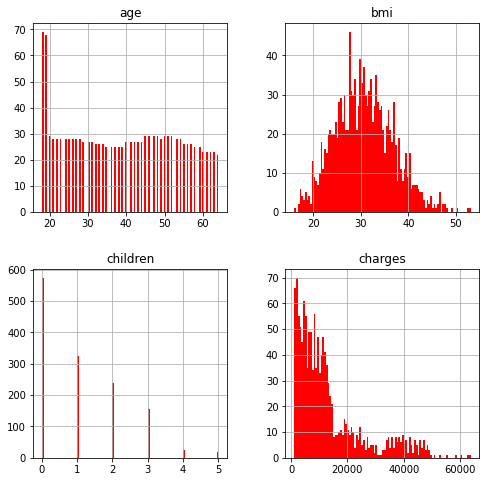

In [6]:
hist = data.hist(bins=100,color='red',figsize=(8, 8))
# Visulization of Data is done when it's required it's not a thumb rule to do so everytime

***Inference*** -

***1. Higher age group of people have greater BMI***

***2. As the age increases we can see that the (premium of the medical insurance) charges are also increasing***

**Data Preprocessing**

***Question - Let's analyze the data***

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


***Inference - We can see that the dataset contains numerical data and as well as categorical data.***

***Note : We don't have to convert categorical data to numerical data everytime while dealing with categorical data. We have to do it only when it's required***

In [8]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


***Question. How can we convert categorical data to numerical data?***

**Converting  categorical data to numerical data.**


> Note - It's not mandatory to covert categorical data to numerical data everytime. E.g - Let's say we have data of 500 rows and columns then converting all the columns and rows is not required




*   Smoker : Yes = 1, No =0

*   Sex : Male = 1 Female = 0




In [9]:
le = LabelEncoder()
data["sex"] = le.fit_transform(data["sex"])
data["sex"].unique()

array([0, 1])

In [10]:
data["smoker"] = le.fit_transform(data["smoker"])
data["smoker"].unique()

array([1, 0])

In [11]:
data["region"] = le.fit_transform(data["region"])
data["region"].unique()

array([3, 2, 1, 0])

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


***Inference - We have used Label Encoder to convert categorical data to numerical data. (To understand different methods of conversion refer Demo of Module 1)***


> ***After conversion we can clearly see that all the categorical data has been converted to numerical data***



**Visualizing the data**

In [13]:
#sns.pairplot(data, hue="smoker");


***Question - Let's try to understand the underlying relationship between all the variables of the dataset?***

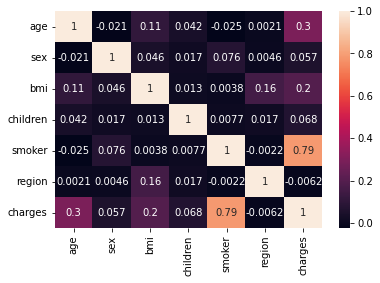

In [14]:
sns.heatmap(data.corr(),annot=True);


***Inference - smoker, age are the most correlated variables with the charges.***

## Given the dataset, we are trying to predict will be the insurance cost based on different demographics.

**1. Building a Linear Regression Model**

In [15]:
# In supervised learning we tell the model what is my Dependent Variable and what is my Independent Variable
# Here in this case my dependent variable is charges and Independent variable is age
X = data[['age']]
Y = data['charges']

In [16]:
# Called Linear Regression Class to perform Linear Regression
from sklearn.linear_model import LinearRegression

# Creating an empty object of Linear Regression class
lg_model = LinearRegression()

lg_model.fit(X,Y)

LinearRegression()

In [17]:
print(lg_model.coef_)   # m = slope
print(lg_model.intercept_) # c = intercept

[257.72261867]
3165.885006063021


**Charges = 257.72261867* age + 3165.885006063021**

In [18]:
from sklearn.metrics import r2_score
r2_score(Y,lg_model.predict(X))

0.08940589967885804

***Inference - Higher the r squared score, better the model.***

> Here it shows that the age has 90% of dependency on the output variable.





***Note - There are other evaluation metrices which will be discussed later.***

In [19]:
# For every given X value using the above equation, what is the predicted Y value
Y_pred = lg_model.predict(X) 
Y_pred

array([ 8062.61476073,  7804.89214207, 10382.11832874, ...,
        7804.89214207,  8578.05999807, 18886.96474474])

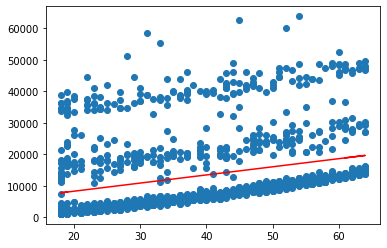

In [20]:
plt.scatter(data['age'],data['charges'])
plt.plot(data['age'],Y_pred,c = 'red')

In [21]:
# In supervised learning we tell the model what is my Dependent variable and what is my Independent variable
X = data[['age']]
Y = data['charges']

# We will have to divide the data into two parts, one for training the model and other for testing the model
from sklearn.model_selection import train_test_split

# we choose spit percentage based on the project objectives and training set, testing set repersentativess, common split is 80-20, 70-30

# test_Size = 30% of the total data will be part of test datasets
# train_test_split does a random selection of subset
# every time we run this part of the code - we will have differet datapoints as part of train & test
# Because every time because train & test data will change the m and c value will change
# and the error will change 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

# Running linear Regression on train data
lm_model = LinearRegression()
lm_model.fit(X_train,Y_train)
print(lm_model.coef_)
print(lm_model.intercept_)


[247.59955092]
3673.8368753317463


In [22]:
from sklearn.metrics import r2_score
r2_score(Y,lg_model.predict(X))

0.08940589967885804

In [23]:
y_pred = lm_model.predict(X_test)

In [24]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df1 = df.head()
df1

,Actual,Predicted
764,9095.06825,14815.816667
887,5272.17580,12587.420709
890,29330.98315,19520.208134
1293,9301.89355,15063.416218
259,33750.29180,8378.228343


In [25]:
# our m & c values - our Linear regression equation is optimized to give low error on train data
# but we don't know how will it perform on unknown data or new data

# Apply on test data - The model performance on test data is how the model is going
# to perform on unknown data or production data 
Y_pred_test = lm_model.predict(X_test)
#Y_pred_test


In [26]:
from sklearn.metrics import r2_score
r2_score(Y,lg_model.predict(X))

0.08940589967885804

In [27]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df1 = df.head()
df1

,Actual,Predicted
764,9095.06825,14815.816667
887,5272.17580,12587.420709
890,29330.98315,19520.208134
1293,9301.89355,15063.416218
259,33750.29180,8378.228343


In [28]:
import statsmodels.api as sm

In [29]:
X = data['age']
y = data['charges']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           4.89e-29
Time:                        06:23:13   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Question - Let's try to build the Multiple Regression model on the same dataset.**

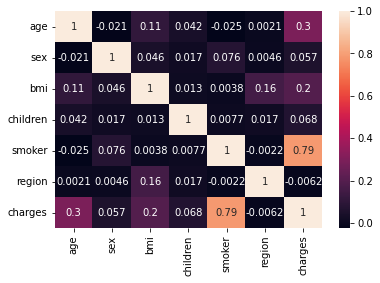

In [30]:
sns.heatmap(data.corr(),annot=True);



***Inference - We can see from the above relation that age and smoker are the most related so to build a model with good accuracy we will take age, smoker as independent variable and charge as dependent variable.***

In [31]:
# Building a Multiple Linear Regression
# Understanding the data so that 2 dependent varaibles can be taken for the model as input 

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [32]:
# Multiple linear regression ( we will be having more independent variables)
lr_data = data[['age','smoker','charges']]
X = lr_data[['age','smoker']]
Y = lr_data['charges']

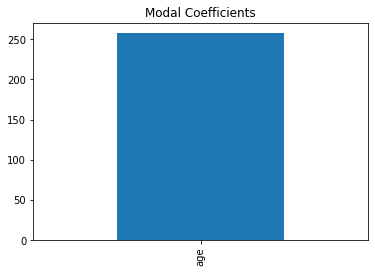

In [33]:
#checking the magnitude of coefficients

predictors = X_train.columns

coef = pd.Series(lg_model.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

Text(0.5, 0, 'charges')

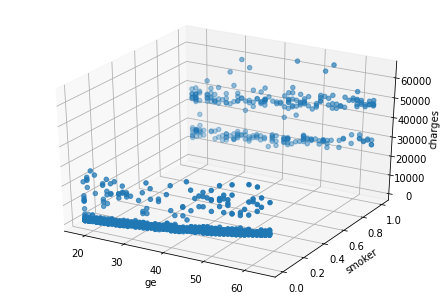

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(lr_data['age'],lr_data['smoker'],lr_data['charges'])
ax.set_xlabel("ge")
ax.set_ylabel("smoker")
ax.set_zlabel("charges")


In [35]:
# We will have to divide the data into two parts
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)


## Run linear Regression on train data
lm_model = LinearRegression()
lm_model.fit(X_train,Y_train)
print(lm_model.coef_)
print(lm_model.intercept_)

[  279.26120647 23665.5699183 ]
-2497.552670000172


**Charges = 257.72261867* age + 3165.885006063021**

In [36]:
from sklearn.metrics import r2_score
r2_score(Y,lm_model.predict(X))

0.7213281677770844

In [ ]:
X_train.columns

Index(['age', 'smoker'], dtype='object')

# **The equation of multiple regression will be:**
*Y= M1X1 + M2X2 +..... MnXn + C*



In [37]:
X_train['age']
Y_train_ser = pd.Series(Y_train.values)
Y_train_ser.shape

(936,)

In [38]:
Y_pred_train = pd.Series(lm_model.predict(X_train))
Y_pred_train.shape

(936,)

Text(0.5, 0, 'charges')

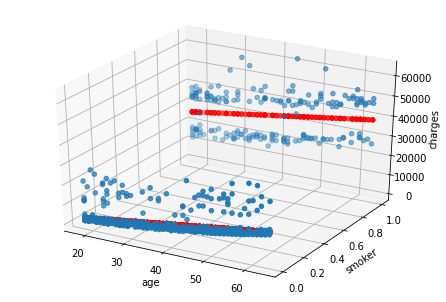

In [39]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train['age'],X_train['smoker'],Y_train)
ax.scatter(X_train['age'],X_train['smoker'],Y_pred_train,color = 'red')
ax.set_xlabel("age")
ax.set_ylabel("smoker")
ax.set_zlabel("charges")

In [40]:
Y_pred_test = lm_model.predict(X_test)
#Y_pred_test


In [41]:
# LINEAR REGRESSION MODEL WIRH 2 IDVs 
r_Square2= r2_score(Y_train,lm_model.predict(X_train))
r_Square2

0.7126978462699898

***Inference - When we have included 2 independent variables we see the r2 score has decreased which means that the other varaible holds a relationship with the dependent variable.***


# Polynomial Regression

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

**Creating data of parabolic plane**

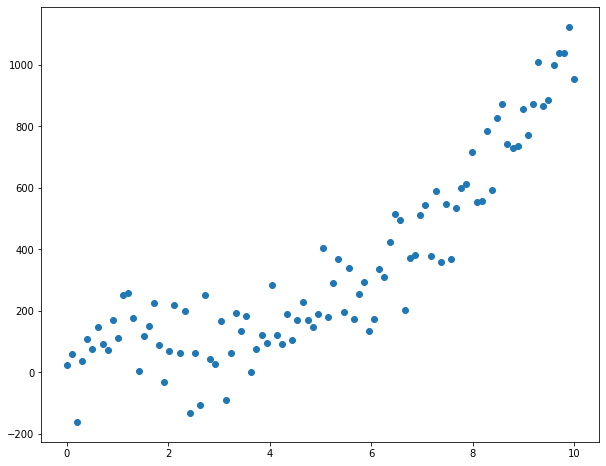

In [43]:
n_samples = 100
X = np.linspace(0, 10, 100)
y = X ** 3 + np.random.randn(n_samples) * 100 + 100
plt.figure(figsize=(10,8))
plt.scatter(X, y)

**Performing Linear Regression to understand how the line fits to this kind of data.**

0.7607719849980352


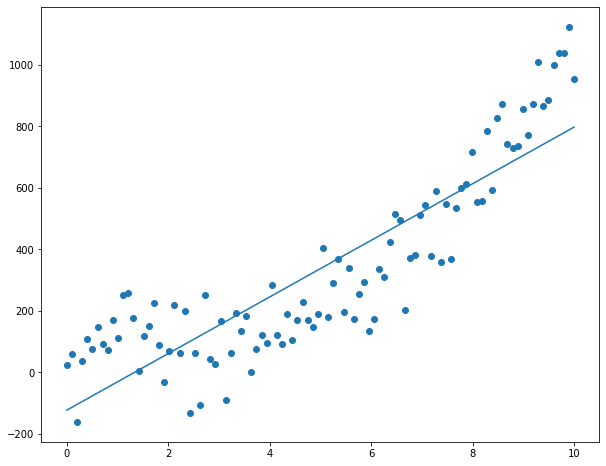

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), y)
model_pred = lin_reg.predict(X.reshape(-1,1))
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, model_pred);
print(r2_score(y, model_pred))

***Inference - We can clearly see that the line misses out a lot of data points and we have the r squared score. If after using polynomial regression, the r squared improves then we can conclude that polynomial regression holds good for the dataset.***

In [45]:
from sklearn.preprocessing import PolynomialFeatures

***Let's do polynomial regression on the same data. We are using degree = 2 for a parabolic function.***

In [46]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))

0.9059580663523237


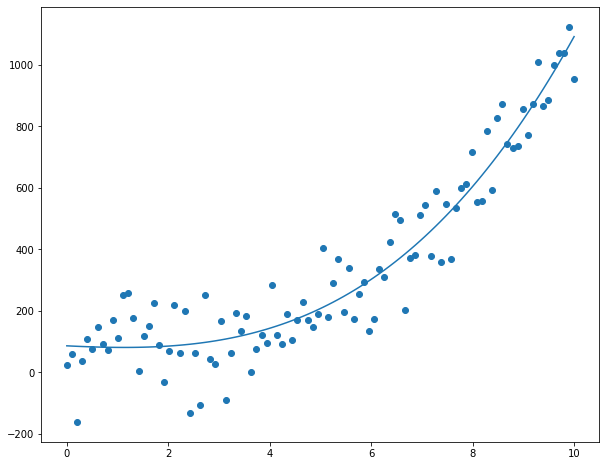

In [47]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, y_pred);
print(r2_score(y, y_pred))

***Inference - We can see from r2 score that this method works well than linear regression because of the dataset being curvilinear.***